In [17]:
import pandas as pd

# 시도지역코드 불러오기

In [18]:
sido = pd.read_csv('data\질병data\시도지역코드.csv', encoding='EUC-KR')
sido.head()

,시도지역코드,지역명
0,11,서울
1,26,부산
2,27,대구
3,28,인천
4,29,광주


In [19]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도지역코드  17 non-null     int64 
 1   지역명     17 non-null     object
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


# 시도별 진료정보 불러오기

In [20]:
import os

path = 'data/질병data/'
file_list = os.listdir(path)
file_list

df = pd.DataFrame()
keywords = ['감기','눈병','천식','피부염']

for i in file_list:
    if i.endswith('_시도.csv'):
        # print(i)
        data = pd.read_csv(path+i, encoding='euc-kr')

        # if '감기' in i:
        #     data['구분'] = '감기'
        # elif '눈병' in i:
        #     data['구분'] = '눈병'
        # elif '천식' in i:
        #     data['구분'] = '천식'
        # elif '피부염식' in i:
        #     data['구분'] = '피부염'
        for key in keywords:
            if key in i:
                data['구분']=key
                break
        
        df = pd.concat([df,data])

In [21]:
df.head()
df.shape

(141588, 4)

In [22]:
df.columns

Index(['날짜', '시도지역코드', '발생건수(건)', '구분'], dtype='object')

In [23]:
sido.columns

Index(['시도지역코드', '지역명'], dtype='object')

In [24]:
# 시도 지역코드의 지역명 가져오기
data_merge=pd.merge(df,sido,how='left',on='시도지역코드')
data_merge

,날짜,시도지역코드,발생건수(건),구분,지역명
0,2023-10-01,11.0,17218.0,감기,서울
1,2023-10-01,26.0,5699.0,감기,부산
2,2023-10-01,27.0,3590.0,감기,대구
3,2023-10-01,28.0,7524.0,감기,인천
4,2023-10-01,29.0,3044.0,감기,광주
...,...,...,...,...,...
141583,NaN,NaN,NaN,피부염,NaN
141584,NaN,NaN,NaN,피부염,NaN
141585,NaN,NaN,NaN,피부염,NaN
141586,NaN,NaN,NaN,피부염,NaN


In [25]:
data_merge['지역명'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '전국', nan], dtype=object)

In [26]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141588 entries, 0 to 141587
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       10264 non-null   object 
 1   시도지역코드   10264 non-null   float64
 2   발생건수(건)  10264 non-null   float64
 3   구분       141588 non-null  object 
 4   지역명      10264 non-null   object 
dtypes: float64(2), object(3)
memory usage: 5.4+ MB


In [27]:
data_merge['년/월'] = data_merge['날짜'].str[:7]
data_merge.head()

,날짜,시도지역코드,발생건수(건),구분,지역명,년/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10


In [31]:
dfData = data_merge[data_merge['지역명'] != '전국']
dfData

,날짜,시도지역코드,발생건수(건),구분,지역명,년/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10
...,...,...,...,...,...,...
141583,NaN,NaN,NaN,피부염,NaN,NaN
141584,NaN,NaN,NaN,피부염,NaN,NaN
141585,NaN,NaN,NaN,피부염,NaN,NaN
141586,NaN,NaN,NaN,피부염,NaN,NaN


## 결측값(null) 행/열 삭제
* 변수명.dropna(axis=0/1, how='any'/'all') <- any: 하나라도 null, all : 행 전체 null

In [34]:
dfData.isnull().sum()

날짜         131324
시도지역코드     131324
발생건수(건)    131324
구분              0
지역명        131324
년/월        131324
dtype: int64

In [36]:
dfData.dropna(axis=0, how='any', inplace=True)
dfData

C:\Users\B8-11\AppData\Local\Temp\ipykernel_2104\507604073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfData.dropna(axis=0, how='any', inplace=True)


,날짜,시도지역코드,발생건수(건),구분,지역명,년/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10
...,...,...,...,...,...,...
108751,2024-02-29,45.0,2.0,피부염,전북,2024-02
108752,2024-02-29,46.0,2193.0,피부염,전남,2024-02
108753,2024-02-29,47.0,2619.0,피부염,경북,2024-02
108754,2024-02-29,48.0,3464.0,피부염,경남,2024-02


In [51]:
yearmonthdf = dfData.groupby(['년/월','구분'],as_index=False)['발생건수(건)'].mean()
yearmonthdf

,년/월,구분,발생건수(건)
0,2023-10,감기,29373.596349
1,2023-10,눈병,2077.245436
2,2023-10,천식,1099.300203
3,2023-10,피부염,2833.022312
4,2023-11,감기,35412.163866
5,2023-11,눈병,1959.560924
6,2023-11,천식,1288.512605
7,2023-11,피부염,2609.516807
8,2023-12,감기,37013.969512
9,2023-12,눈병,1872.800813


In [40]:
dfData['년/월'].unique()

array(['2023-10', '2023-11', '2023-12', '2024-01', '2024-02'],
      dtype=object)

In [ ]:
#년/월 구분별 발생건수 평균
dfData[['년','월']] = dfData['년/월'].str.split('-',expand=True)
dfData

In [49]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

dfData_pivot = dfData.pivot_table(index='구분', columns=['년','월'], values='발생건수(건)', aggfunc='mean')
dfData_pivot

년            2023                                      2024              
월              10            11            12            01            02
구분                                                                       
감기   29373.596349  35412.163866  37013.969512  29773.511156  24377.571739
눈병    2077.245436   1959.560924   1872.800813   1790.464503   1721.552174
천식    1099.300203   1288.512605   1318.876016   1149.563895    948.906522
피부염   2833.022312   2609.516807   2338.969512   2313.509128   2265.293478

<Axes: xlabel='구분'>

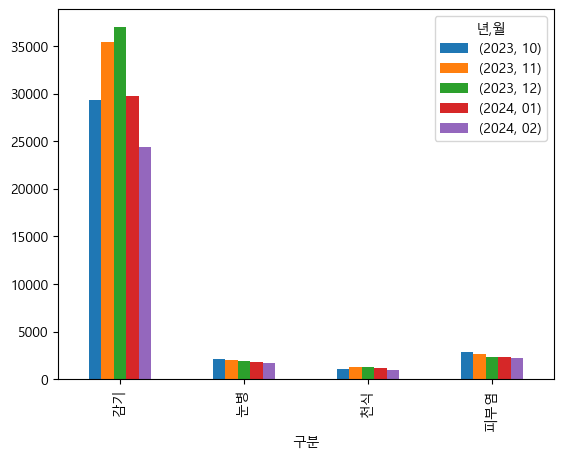

In [50]:
dfData_pivot.plot(kind='bar')

In [57]:
yearmonthdf['년/월'].unique()

array(['2023-10', '2023-11', '2023-12', '2024-01', '2024-02'],
      dtype=object)

       년/월   구분       발생건수(건)
4  2023-11   감기  35412.163866
5  2023-11   눈병   1959.560924
6  2023-11   천식   1288.512605
7  2023-11  피부염   2609.516807


<Axes: xlabel='구분'>

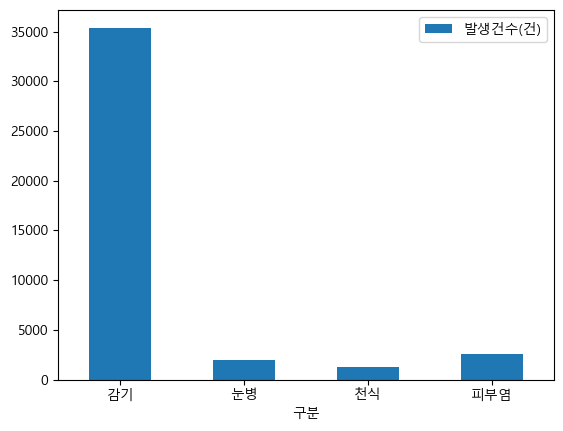

In [54]:
#년/월 구분별 발생건수 평균
import matplotlib.pyplot as plt

plt.rc('font',family='malgun gothic')

yearMonthin = input('조회 년/월 입력 >> ')
yearMonthSearch = yearmonthdf[yearmonthdf['년/월']==yearMonthin]

print(yearMonthSearch)

yearMonthSearch.plot(kind='bar', x='구분', rot=0)
